# 模型选择、欠拟合和过拟合

* 例如，我们想要在患者的基因数据与痴呆状态之间寻找模式，
其中标签是从集合$\{\text{痴呆}, \text{轻度认知障碍}, \text{健康}\}$中提取的。

* 因为基因可以唯一确定每个个体（不考虑双胞胎），
所以在这个任务中是有可能记住整个数据集的。

* 我们不想让模型只会做这样的事情：“那是鲍勃！我记得他！他有痴呆症！”。

当我们使用有限的样本时，可能会遇到这样的问题：
当收集到更多的数据时，会发现之前找到的明显关系并不成立。

## 训练误差和泛化误差

* *训练误差*（training error）是指，
模型在训练数据集上计算得到的误差。
* *泛化误差*（generalization error）是指，
模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的*期望*。

### 模型复杂性

几个倾向于影响模型泛化的因素：

1. 可调整参数的数量。当可调整参数的数量（有时称为*自由度*）很大时，模型往往更容易过拟合。
1. 参数采用的值。当权重的取值范围较大时，模型可能更容易过拟合。
1. 训练样本的数量。即使你的模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

## 模型选择

* 例如，训练多层感知机模型时，我们可能希望比较具有
不同数量的隐藏层、不同数量的隐藏单元以及不同的的激活函数组合的模型。
* 为了确定候选模型中的最佳模型，我们通常会使用验证集。

### 验证集

* 如果我们过拟合了训练数据，还可以在测试数据上的评估来判断过拟合。
* 因此，我们决不能依靠测试数据进行模型选择。
* *验证集*（validation set）

### $K$折交叉验证

当训练数据稀缺时，我们甚至可能无法提供足够的数据来构成一个合适的验证集。

* 这里，原始训练数据被分成$K$个不重叠的子集。
* 然后执行$K$次模型训练和验证，每次在$K-1$个子集上进行训练，
并在剩余的一个子集（在该轮中没有用于训练的子集）上进行验证。
* 最后，通过对$K$次实验的结果**取平均**来估计训练和验证误差。

## 欠拟合还是过拟合

### *欠拟合*（underfitting）

* 如果模型不能降低训练误差，这可能意味着模型过于简单（即表达能力不足），
无法捕获试图学习的模式。
* 训练误差和验证误差都很严重，
但它们之间仅有一点差距。

### *过拟合*（overfitting）

* 训练误差明显低于验证误差时

### 模型复杂性

<center><img src="capacity-vs-error.svg" width="50%"></center>
<center>模型复杂度对欠拟合和过拟合的影响</center>

### 数据集大小

* 训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。
* 随着训练数据量的增加，泛化误差通常会减小。

## 多项式函数拟合问题

$$
f_M(x,w)=w_0+w_1x+w_2x^2+\dotsb+w_Mx^M=\sum_{j=0}^Mw_jx^j
$$

$$
L(w)=\frac{1}{2}\sum_{i=1}^N\biggl(\sum_{j=0}^Mw_jx_i^j-y_i\biggr)^2
$$

* 定义矩阵$X$为：
$$
X=
\begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^M\\
1 & x_2 & x_2^2 & \dots & x_2^M\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_N & x_N^2 & \dots & x_N^M
\end{bmatrix}
$$
* 我们有$L(w)$为：
$$L(w)=\frac{1}{2}\|Xw-y\|^2$$


* 目标函数$y=\sin2{\pi}x$
* 加上一个正态分布的噪音干扰

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.optimize import leastsq

%matplotlib inline

`np.poly1d([1,2,3])`  生成  $1x^2+2x^1+3x^0$

In [2]:
# 目标函数
def real_func(x):
    return np.sin(2 * np.pi * x)


# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)


# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [3]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y = np.random.normal(0, 0.1, 10) + real_func(x)

In [4]:
def fitting(M=0):
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print("Fitting Parameters:", p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label="real")
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label="fitted curve")
    plt.plot(x, y, "bo", label="noise")
    plt.legend()
    return p_lsq

如果$M=0$，多项式曲线是一个常数，数据拟合效果很差

Fitting Parameters: [0.00470092]


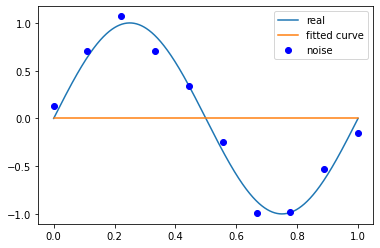

In [5]:
# M=0
p_lsq_0 = fitting(M=0)

如果$M=1$，多项式曲线是一条直线，数据拟合效果也很差

Fitting Parameters: [-1.47640775  0.7429048 ]


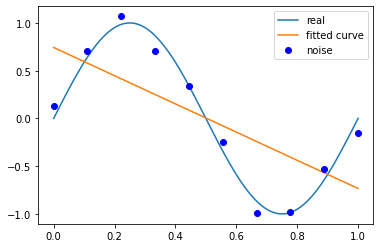

In [6]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 19.41115264 -28.9255529    9.37999812   0.10022437]


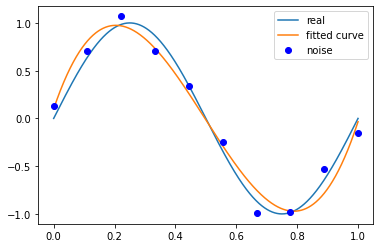

In [7]:
# M=3
p_lsq_3 = fitting(M=3)

相反，如果$M=9$，多项式曲线通过每个数据点，训练误差为0

Fitting Parameters: [ 5.97842513e+03 -2.16008161e+04  2.91828979e+04 -1.63161106e+04
  4.53488919e+02  3.72938707e+03 -1.69255037e+03  2.74279696e+02
 -9.27739544e+00  1.24967558e-01]


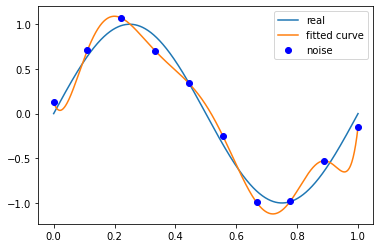

In [8]:
# M=9
p_lsq_9 = fitting(M=9)

* 在多项式函数拟合中可以看到，随着多项式次数（模型复杂度）的增加，训练误差会减小，直至趋向于0
* 但是测试误差却不如此，它会随着多项式次数（模型复杂度）的增加先减小而后增大

# 权重衰减

重难点\_权重衰减.pdf

* 根据之前章节所讲的，我们根据估计值与观测值之间的差异来更新$\mathbf{w}$。
* 然而，我们同时也在试图将$\mathbf{w}$的大小缩小到零。
* 这就是为什么这种方法有时被称为*权重衰减*。

In [9]:
regularization = 1e-4


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

`sum(func**2, axis=0)` within `leastsq`

In [10]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

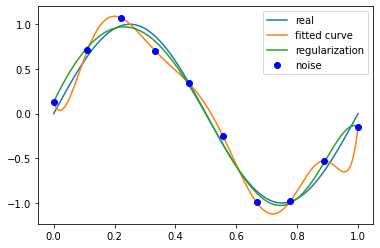

In [11]:
plt.plot(x_points, real_func(x_points), label="real")
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label="fitted curve")
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label="regularization")
plt.plot(x, y, "bo", label="noise")
plt.legend()